Content
Complete Dataset consists of 2 CSV files. One of them is training and other is for testing the model.
132 of these columns are symptoms that a person experiences.
Last column is the prognosis consisting of 42 diseases.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

Dataset link:
https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

In [2]:
train = pd.read_csv(r"AI_DS_Projects\Disease_Prediction\Training.csv")
test = pd.read_csv(r"AI_DS_Projects\Disease_Prediction\Testing.csv")

In [3]:
train.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
test.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD


In [5]:
# print out the names of all columns in the train DataFrame that contain at least one null value.
null_columns_train = train.columns[train.isnull().any()].tolist()
print(null_columns_train)

['Unnamed: 133']


In [6]:
# Removing 'Unnamed' column
train = train.drop(['Unnamed: 133'], axis=1)

In [7]:
# print out the names of all columns in the Test DataFrame that contain at least one null value.
null_columns_test = test.columns[test.isnull().any()].tolist()
print(null_columns_test)

[]


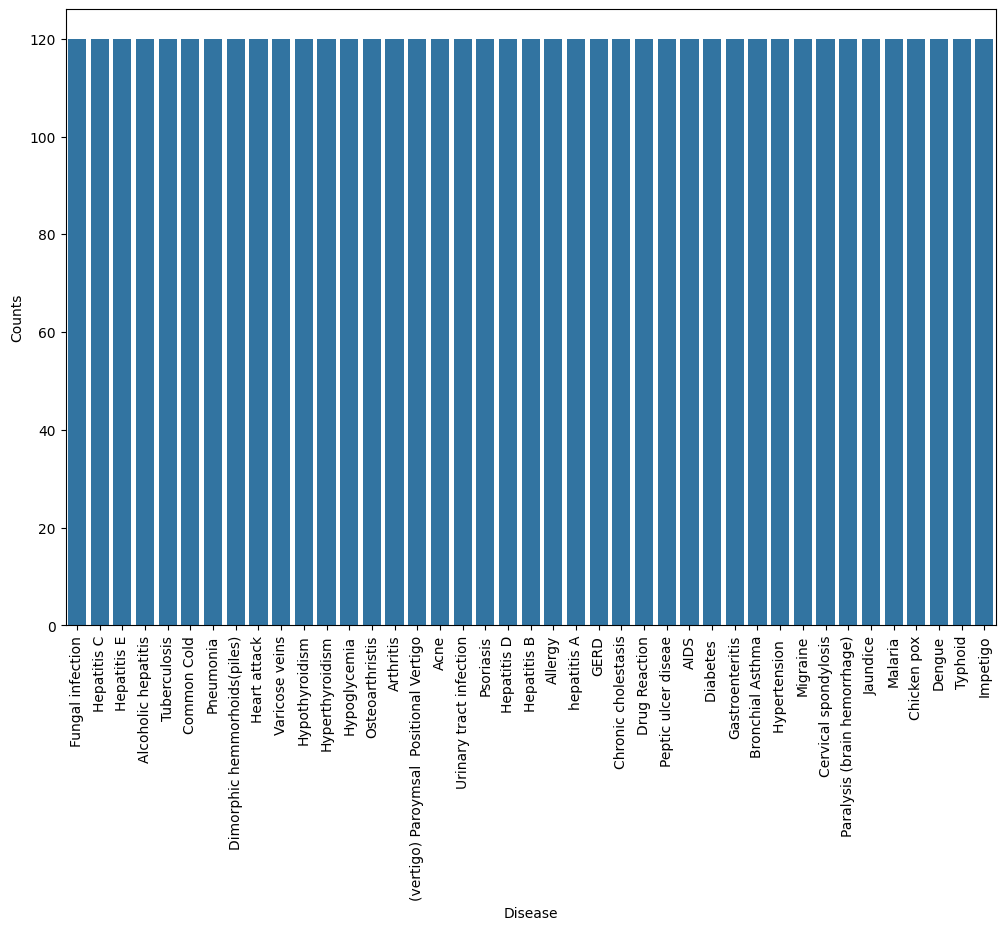

In [8]:
# Visualizing whether target column is balanced or not (only for train data)
disease_counts = train.prognosis.value_counts()

new_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(12,8))
sns.barplot(x="Disease", y="Counts", data = new_df)
plt.xticks(rotation = 90)
plt.show()

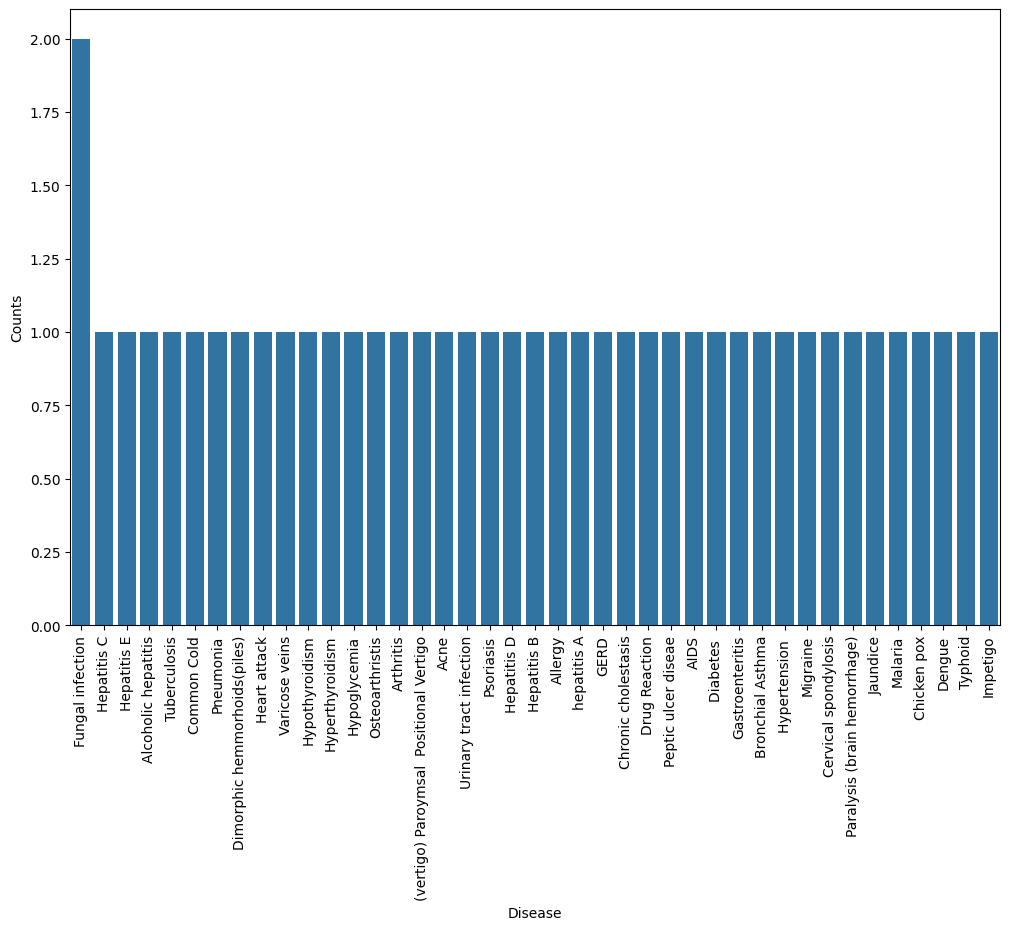

In [9]:
# Visualizing whether target column is balanced or not for test data)
disease_counts = test.prognosis.value_counts()

new_df_2 = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(12,8))
sns.barplot(x="Disease", y="Counts", data = new_df_2)
plt.xticks(rotation = 90)
plt.show()

In [10]:
new_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


In [11]:
# Splitting the training data into X and y
X = train.drop(['prognosis'], axis=1)
y = train.prognosis

# Splitting the X, y into another training and validation
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)
# Define Naive Bayes Classifier
nb_model = GaussianNB()

# Fit model
rf_model.fit(train_X, train_y)
nb_model.fit(train_X, train_y)

GaussianNB()

In [13]:
# get predicted on validation data
rf_val_predictions = rf_model.predict(val_X)

nb_val_predictions = nb_model.predict(val_X)

In [14]:
print("training accuracy of RF is:",accuracy_score(val_y, rf_val_predictions))
print("training accuracy of NaiveBias is:",accuracy_score(val_y, nb_val_predictions))

training accuracy of RF is: 1.0
training accuracy of NaiveBias is: 1.0


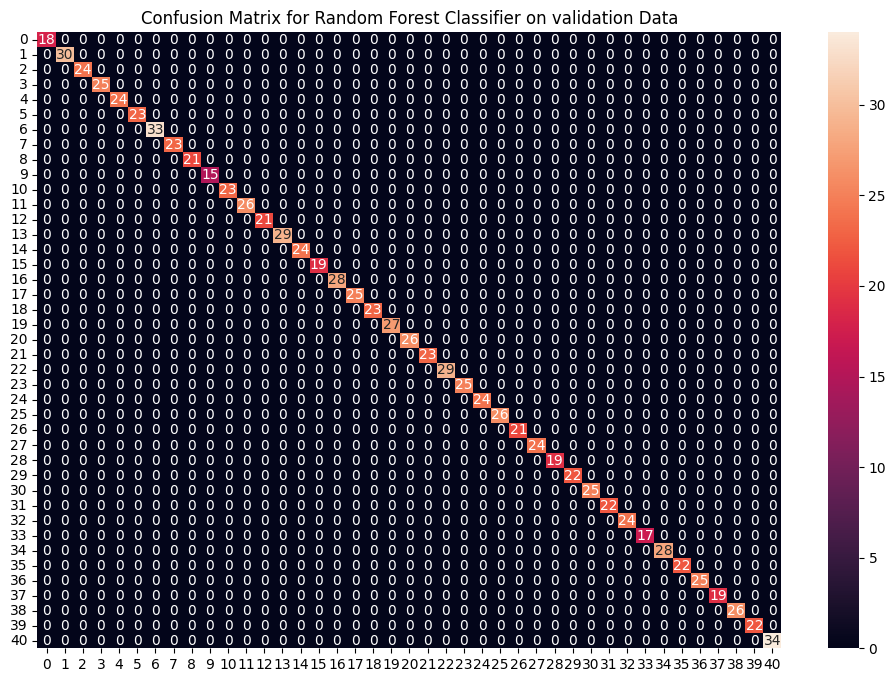

In [15]:
cf_matrix = confusion_matrix(val_y, rf_val_predictions)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on validation Data")
plt.show()

In [16]:
# Fitting the model on whole train data and predicting on whole Test dataset:
# Define RandomForest Classifier
Final_rf_model = RandomForestClassifier(random_state=42)
# Define Naive Bayes Classifier
Final_nb_model = GaussianNB()

# Fit model
Final_rf_model.fit(X, y)
Final_nb_model.fit(X, y)

GaussianNB()

In [17]:
# Splitting the Test data into test_X and test_y
test_X = test.drop(['prognosis'], axis=1)
test_y = test.prognosis

In [18]:
# get predicted on validation data
rf_test_predictions = Final_rf_model.predict(test_X)
nb_test_predictions = Final_nb_model.predict(test_X)

print("Test accuracy of RF is:", accuracy_score(test_y, rf_test_predictions))
print("Test accuracy of nb is:", accuracy_score(test_y, nb_test_predictions))

Test accuracy of RF is: 0.9761904761904762
Test accuracy of nb is: 1.0


Note: GaussianNB gives better prediction than Randomforest even though both were equal while testing on validation data.